In [23]:
import sys, os
sys.path.insert(0, os.getcwd())
sys.path.insert(0, os.path.dirname(os.getcwd()))
sys.path.insert(0,os.path.join(os.path.dirname(os.getcwd()), "testing"))
from testing.isi_corr import *

def dnn_vs_um(mt_path:str):
    mt = pd.read_csv(mt_path)
    sessions = set(mt["RecSes1"].unique())
    dnn_auc, um_auc, numbers_d, numbers_u = [], [], [], []
    for r1 in tqdm(sessions):
        for r2 in tqdm(sessions):
            if r1>=r2:
                continue
            dnn, um, n_dnn, n_um = auc_one_pair(mt, r1, r2, mt_path=mt_path, dist_thresh=20)
            if dnn is not None and um is not None:
                dnn_auc.append(dnn)
                numbers_d.append(n_dnn)
                um_auc.append(um)
                numbers_u.append(n_um)
    return dnn_auc, numbers_d, um_auc, numbers_u

def dnn_vs_dnn(mt_path1:str, mt_path2:str):
    mt1 = pd.read_csv(mt_path1)
    mt2 = pd.read_csv(mt_path2)
    sessions = set(mt1["RecSes1"].unique())
    dnn1_auc, dnn2_auc, numbers_d1, numbers_d2 = [], [], [], []
    for r1 in tqdm(sessions):
        for r2 in tqdm(sessions):
            if r1>=r2:
                continue
            dnn1, _, n_dnn1, _ = auc_one_pair(mt1, r1, r2, mt_path=mt_path1, dist_thresh=20)
            dnn2, _, n_dnn2, _ = auc_one_pair(mt2, r1, r2, mt_path=mt_path2, dist_thresh=20)
            if dnn1 is not None and dnn2 is not None:
                dnn1_auc.append(dnn1)
                numbers_d1.append(n_dnn1)
                dnn2_auc.append(dnn2)
                numbers_d2.append(n_dnn2)
    return dnn1_auc, numbers_d1, dnn2_auc, numbers_d2


In [ ]:
test_data_root = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "ALL_DATA")
mt_path = os.path.join(test_data_root, "AV009", "Probe1", "IMRO_10", "new_matchtable.csv")
mt_pathalt = os.path.join(test_data_root, "AV009", "Probe1", "IMRO_10", "new_matchtable_alt10.csv")

dnn_auc10, numbers_d10, dnn_auc18, numbers_d18 = dnn_vs_dnn(mt_path, mt_pathalt)


  0%|          | 0/27 [00:00<?, ?it/s]

no DNN matches found!


no DNN matches found!
no DNN matches found!


no DNN matches found!


no DNN matches found!


no DNN matches found!


  4%|▎         | 1/27 [1:17:44<33:41:21, 4664.66s/it]

no DNN matches found!
no DNN matches found!


no DNN matches found!


no DNN matches found!


no DNN matches found!


no DNN matches found!


no DNN matches found!


  7%|▋         | 2/27 [2:26:58<30:18:19, 4363.99s/it]

no DNN matches found!


 11%|█         | 3/27 [3:38:34<28:53:10, 4332.94s/it]

no DNN matches found!


no DNN matches found!


no DNN matches found!


 15%|█▍        | 4/27 [4:40:49<26:10:34, 4097.14s/it]

no DNN matches found!
no DNN matches found!


no DNN matches found!


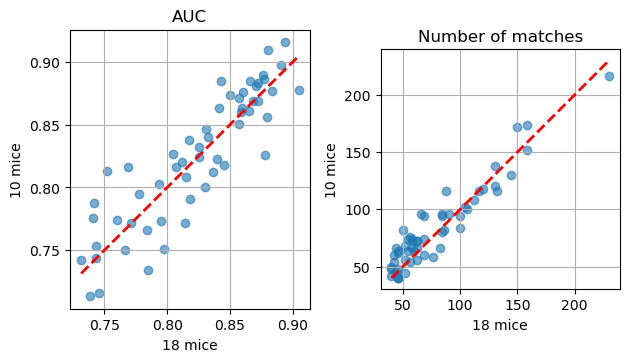

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(121, aspect='equal')
ax1.scatter(dnn_auc18, dnn_auc10, alpha=0.6)
ax1.plot([min(dnn_auc18), max(dnn_auc18)], [min(dnn_auc18), max(dnn_auc18)], 'r--', lw=2)
ax1.grid()
ax1.set_yticks(np.linspace(0.75, 0.90, 4))
ax1.set(title="AUC", xlabel="18 mice", ylabel="10 mice")
ax2 = fig.add_subplot(122, aspect='equal')
ax2.scatter(numbers_d18, numbers_d10, alpha=0.6)
ax2.plot([min(numbers_d18), max(numbers_d18)], [min(numbers_d18), max(numbers_d18)], 'r--', lw=2)
ax2.grid()
ax2.set(title="Number of matches", xlabel="18 mice", ylabel="10 mice")
fig.tight_layout()
plt.show()

In [52]:
sessions = mt["RecSes1"].unique()

mat = np.zeros((len(sessions), len(sessions)))

for i, j in tqdm(np.ndindex(mat.shape), total=len(sessions)**2):
    small=mt.loc[(mt["RecSes1"].isin([sessions[i],sessions[j]])) & (mt["RecSes2"].isin([sessions[i],sessions[j]])),:]
    med = np.median(small["DNNSim"])
    mat[i,j] = med


100%|██████████| 441/441 [00:29<00:00, 15.20it/s]


Text(0.5, 1.0, 'DNNSim medians for AL036 sessions')

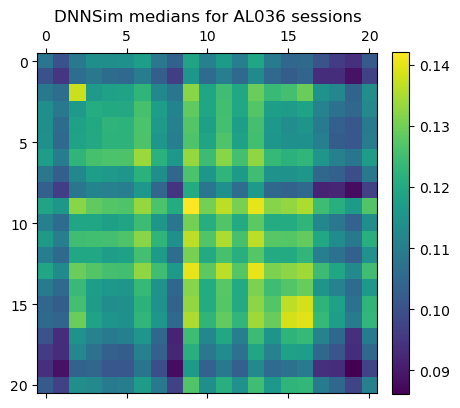

In [57]:
cax = plt.matshow(mat)
plt.colorbar(cax,fraction=0.046, pad=0.04)
plt.title("DNNSim medians for AL036 sessions")